# Predicting and Analysing Car Prices and Car Insurance Status, Task 4

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Analysing Data 

### Importing the dataset

This will import the dataset.

This dataset includes 12 features:
- Price. The sale price of the vehicle
- Years. The vehicle registration year
- Brand. The brand of the car
- Model. The model of the vehicle
- state/city. The location in which the car is being available for purchase
- mileage. miles traveled by vehicle
- Vin. The vehicle identification number
- Title Status. This feature included binary classification, which are clean title vehicles and salvage insurance
- Lot. Number by manufacturer combined to make vin
- Condition

In [42]:
import os
# it was supposed to call the dirname, but it did not work so I downloaded file
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

cars = pd.read_csv('./USA_cars_datasets.csv')

##checking data
cars.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


### Dropping unnecesary columns
This colums as we can see such as 'Unnamed:0', or Condition are columns that will not help us in the prediction.

In [43]:
cars.drop(['vin', 'lot', 'Unnamed: 0', 'condition'], axis=1, inplace=True)
cars.head()

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa


### Checking the column types and other info

We are going to check the type of objects and columns that we have to choose which ones can be useful to predict

In [44]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   state         2499 non-null   object 
 8   country       2499 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 175.8+ KB


### Finding general stadistics

We are finding general statistics for the different columns, such as mean, count, standard deviation, the quarterly, this will give as a way to visualise how the data is distrubuted between columns.

In [45]:
cars.describe().style.format('{:0.2f}')

,price,year,mileage
count,2499.00,2499.00,2499.00
mean,18767.67,2016.71,52298.69
std,12116.09,3.44,59705.52
min,0.00,1973.00,0.00
25%,10200.00,2016.00,21466.50
50%,16900.00,2018.00,35365.00
75%,25555.50,2019.00,63472.50
max,84900.00,2020.00,1017936.00


We are checking if there are any nulls before analysing as this could impact or prediction.

In [46]:
cars.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
country         0
dtype: int64

### Checking mileage vs price and year vs price

We will visualise how the price changes as the mileage and the price and year (the year the vehicle was registered) increases. 

Text(0.5, 0, 'Year')

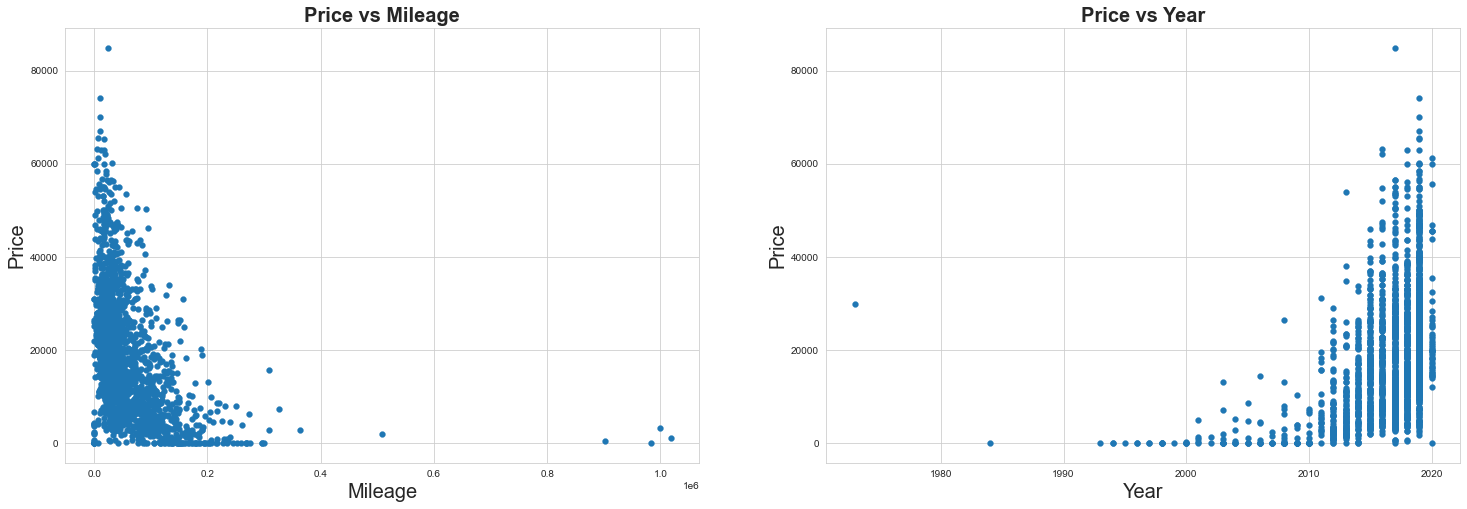

In [47]:
sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))

ax1.scatter(x='mileage', y='price', data=cars, marker='.', linewidth= .3, s=140)

ax2.scatter(x='year', y='price', data=cars, marker='.', linewidth= .3, s=140)

ax1.set_title('Price vs Mileage', fontsize=20, fontweight='bold')
ax1.set_ylabel('Price',fontsize=20)
ax1.set_xlabel('Mileage',fontsize=20)


ax2.set_title('Price vs Year', fontsize=20, fontweight='bold')
ax2.set_ylabel('Price',fontsize=20)

ax2.set_xlabel('Year',fontsize=20)


We can observe from Price vs Mileage that as the car has more mileage, the price decreases exponentially. 

We can also observe that the price of cars tend to rise with time from Price vs Year plot.
We can conclude that new vehicle tend to be more expensive with the year than old vehicles. At least when it is registered. 

### Visualising proportion of title status vehicles

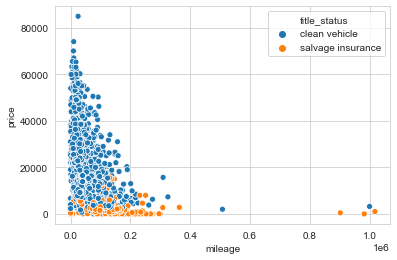

In [48]:
sns.scatterplot(y='price', x='mileage', data=cars, hue='title_status')

We can observe that there is higher price with clean vehicles than salvage insurance. We can also observe some outliers.In the graph. The price tends to decrease exponentionally as the millage increases

### Visualising Price Distribution with the quantities of cars released.

Text(0, 0.5, 'Quantity')

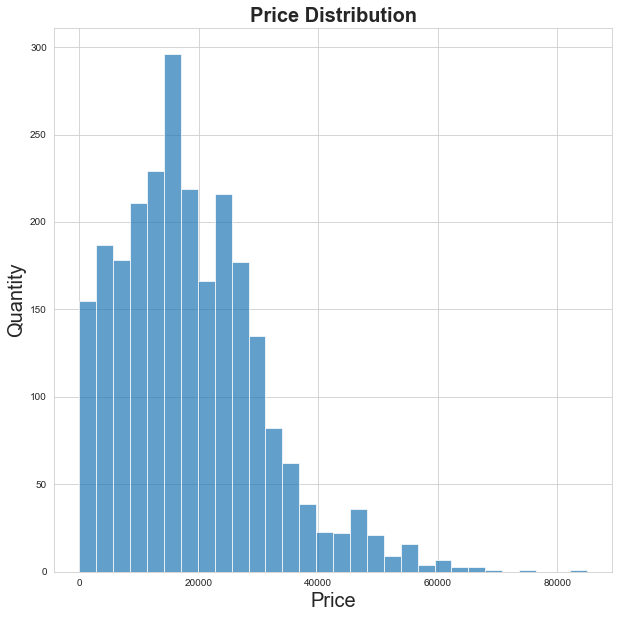

In [49]:
plt.figure(figsize=(10, 10))
price_distribution = plt.hist(x='price', data=cars, bins=30, alpha=.7)
plt.title('Price Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Price', fontsize=20)
plt.ylabel('Quantity', fontsize=20)


We can conclude from the graph the following observations. As there is less quantity of cars, re

## Prediction of Prices 

We are going to predict the price of cars based in different feautures by using different models

### Linear Regression Prediction

Checking different brands

In [50]:
cars['brand'].nunique()

28

## Encoding columns 

In [51]:
cars.drop(['country'], axis=1, inplace=True)
cars.head()

,price,brand,model,year,title_status,mileage,color,state
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida


#### We are going to encode the data using get_dummies(), and we will add it to the current dataframe as columns. 

In [52]:

brand = pd.get_dummies(cars['brand'], drop_first=True)
model= pd.get_dummies(cars['model'], drop_first=True)
title = pd.get_dummies(cars['title_status'], drop_first=True)
color = pd.get_dummies(cars['color'], drop_first=True)
state = pd.get_dummies(cars['state'], drop_first=True)

cars_modelling_data = pd.concat([cars, brand, model, title, state, color], axis=1)

In [53]:
cars_modelling_data.head()

,price,brand,model,year,title_status,mileage,color,state,audi,bmw,...,silver,super black,tan,toreador red,triple yellow tri-coat,turquoise,tuxedo black metallic,white,white platinum tri-coat metallic,yellow
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,0,0,...,1,0,0,0,0,0,0,0,0,0
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,0,0,...,1,0,0,0,0,0,0,0,0,0
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Deleting the old columns that have text, as the new columns has only numbers

In [54]:
cars_modelling_data.drop(['brand', 'model', 'state','title_status', 'mileage', 'color'], axis=1,inplace=True)


In [55]:
cars_modelling_data

,price,year,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,...,silver,super black,tan,toreador red,triple yellow tri-coat,turquoise,tuxedo black metallic,white,white platinum tri-coat metallic,yellow
0,6300,2008,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2899,2011,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,5350,2018,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,25000,2014,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,27700,2018,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,2019,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2495,9200,2018,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2496,9200,2018,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2497,9200,2018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Defining X and y.
X will be all the other columns except the price column, therefore using the drop() method will return a new dataset without the feature.

<b>Notice that inplace parameter is not set, therefore it won't affect the original data</b>

y will be the target, in this case the price column


In [56]:

X = cars_modelling_data.drop(['price'], axis=1)

y = cars_modelling_data['price']

print(X.shape, y.shape)

(2499, 246) (2499,)


K-Fold cross validation to validate the model

In [57]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Using LinearRegression() model with GridSearch to find the best parameters to use.


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#initialise params to prove
params = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X': [True, False], 'n_jobs': [1, 2, 3, 4, 5, 10, 15]}

linear_reg = LinearRegression(fit_intercept=False, normalize=True, copy_X=True, n_jobs=1)
clf = GridSearchCV(linear_reg, param_grid=params)
clf.fit(X, y)
#print(clf.score(X, y))
#print(clf.predict(X))
#print(clf.best_params_)
#print(clf.best_score_)

linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
#print(linear_reg.score(X, y))
coef = linear_reg.coef_

#Check how well it is performing
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))


RMSE 10874.405324287374
MAE 89.56284926579478


plotting correlation between target price and predicted price

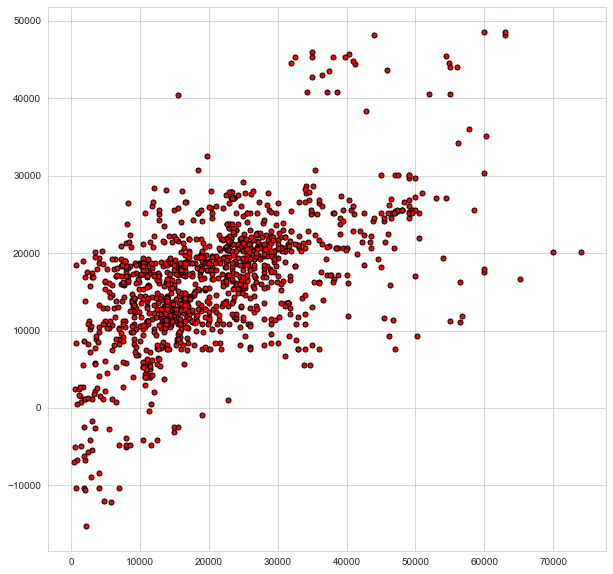

In [59]:

plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred,marker='.',c='red',edgecolors='black',s=100,linewidth=1)


AS we can see from the previous graph, there is some correlation between the predicted price and the target price. However we can observe that it is not a perfect correlation.

We are going to plot the error between target price and predicted price using a histogram to see the distribution of the errors.

<b>the error E = (y_test - y_pred) </b>

(array([  1.,   0.,   3.,  11.,  24.,  41.,  65.,  93.,  94., 160., 167.,
        154., 129.,  84.,  53.,  26.,  46.,  39.,  24.,  11.,   6.,   2.,
          4.,   1.,   2.,   3.,   3.,   1.,   1.,   1.]),
 array([-24951.91457318, -22323.90752236, -19695.90047155, -17067.89342073,
        -14439.88636992, -11811.8793191 ,  -9183.87226828,  -6555.86521747,
         -3927.85816665,  -1299.85111584,   1328.15593498,   3956.16298579,
          6584.17003661,   9212.17708742,  11840.18413824,  14468.19118905,
         17096.19823987,  19724.20529068,  22352.2123415 ,  24980.21939231,
         27608.22644313,  30236.23349394,  32864.24054476,  35492.24759557,
         38120.25464639,  40748.2616972 ,  43376.26874802,  46004.27579883,
         48632.28284965,  51260.28990047,  53888.29695128]),
 <a list of 30 Patch objects>)

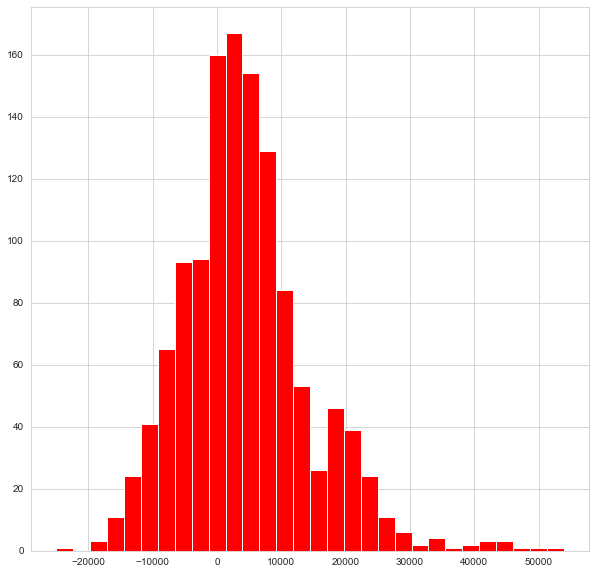

In [60]:
plt.figure(figsize=(10, 10))
plt.hist((y_test - y_pred), bins=30, color='r')

## Logistic Regression to predict car insurance status


In [61]:
#kfold = KFold(n_splits=2)
X = cars_modelling_data.drop(['salvage insurance'], axis=1)
y = cars_modelling_data['salvage insurance']
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
kfold = KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [62]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
logic_reg = LogisticRegression(solver='liblinear', penalty='l1')

#grid_values = {'solver': ['liblinear'], 'max_iter': [100], 'penalty': ['l1', 'l2'],'C':np.logspace(-4, 4, 20)}
#clf = GridSearchCV(logic_reg, param_grid = grid_values,scoring = 'recall')
#clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

#best_clf = clf.fit(X_train, y_train)
logic_reg.fit(X_train, y_train)
#print(logic_reg.)

{'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'normalize': True}
-1669.1619518203813


LogisticRegression(penalty='l1', solver='liblinear')

We are going to check how well the algorithm performs by using a confusion matrix

      salvage insurance
0                     0
1                     0
2                     0
3                     0
4                     0
...                 ...
2494                  0
2495                  0
2496                  0
2497                  0
2498                  0

[2499 rows x 1 columns]
[[1184    4]
 [  40   21]]


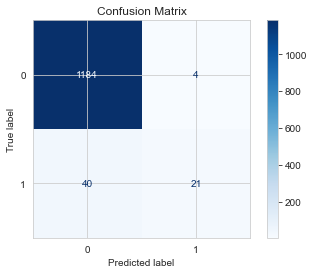

In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
y_pred = clf.predict(X_test)

disp = plot_confusion_matrix(best_clf, X_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')

print(title)
print(disp.confusion_matrix)

#### We get the following results calcualting the accuracy, precision, recall and F1

In [71]:
accuracy = (disp.confusion_matrix[0][0] + disp.confusion_matrix[1][1]) / (disp.confusion_matrix[0][0] + disp.confusion_matrix[0][1] + disp.confusion_matrix[1][0] + disp.confusion_matrix[1][1])
precision = (disp.confusion_matrix[0][0]) / (disp.confusion_matrix[0][0] + disp.confusion_matrix[0][1])
recall = (disp.confusion_matrix[0][0]) / (disp.confusion_matrix[0][0] + disp.confusion_matrix[0][1])
F1 = 2 * precision * recall / (precision + recall)
print('accuracy', accuracy)
print('precision', precision)
print('recall', recall)
print('F1', F1)

accuracy 0.9647718174539631
precision 0.9966329966329966
recall 0.9966329966329966
F1 0.9966329966329966


## Conclusion

We found that linear Regression model was not very accurate to predict the prices, other models could be used to predict it better. 

Logistic Regression was found to perform very well with predicting the classes and car satus.